# Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import mlxtend.frequent_patterns as mlp

%matplotlib inline

#  Exploratory data analysis

In [108]:
trans = pd.read_excel('QVI_transaction_data.xlsx')
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [109]:
trans.head()
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [110]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [111]:
# Converting the date column to datetime 

trans['DATE'] = pd.to_datetime(trans.DATE, unit='D', origin=pd.Timestamp('1899-12-30'))

In [112]:
trans['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [113]:
#list(trans['PROD_NAME'].unique())

In [114]:
def clean(data):
    '''
        Removes special characters and non alphabets from data
    '''
    data = re.sub(r'[^a-zA-Z]+[a-zA-Z]$', ' ', data)
    data = re.sub(r'[^a-zA-Z]{1,}', ' ', data)
    return data.rstrip()

In [115]:
trans['PROD_NAME_ALONE'] = trans.apply(lambda x : clean(x.PROD_NAME), axis=1)

In [116]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S Cream Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny Jlpno Chili


In [117]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DATE             264836 non-null  datetime64[ns]
 1   STORE_NBR        264836 non-null  int64         
 2   LYLTY_CARD_NBR   264836 non-null  int64         
 3   TXN_ID           264836 non-null  int64         
 4   PROD_NBR         264836 non-null  int64         
 5   PROD_NAME        264836 non-null  object        
 6   PROD_QTY         264836 non-null  int64         
 7   TOT_SALES        264836 non-null  float64       
 8   PROD_NAME_ALONE  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


In [118]:
trans['PROD_NAME_ALONE'].value_counts()

Kettle Mozzarella Basil Pesto          3304
Kettle Tortilla ChpsHny Jlpno Chili    3296
Cobs Popd Swt Chlli Sr Cream Chips     3269
Tyrrells Crisps Ched Chives            3268
Cobs Popd Sea Salt Chips               3265
                                       ... 
RRD Pc Sea Salt                        1431
Woolworths Medium Salsa                1430
NCC Sour Cream Garden Chives           1419
French Fries Potato Chips              1418
WW Crinkle Cut Original                1410
Name: PROD_NAME_ALONE, Length: 114, dtype: int64

In [119]:
#Removing salsa products from the dataset

trans = trans[trans['PROD_NAME_ALONE'].str.contains('Salsa') == False]

In [120]:
trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [121]:
#Noticed an outlier in PROD_QTY and proceeded to investigate

trans.loc[trans['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


In [122]:
trans.loc[(trans['PROD_NAME_ALONE'].str.contains('Dorito Corn Chp S')) & (trans['STORE_NBR'] == 226)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
14987,2019-05-02,226,226011,226272,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
14992,2018-11-08,226,226029,226377,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
15028,2018-10-13,226,226108,226782,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
15064,2018-07-05,226,226195,227267,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
15071,2019-04-19,226,226200,227298,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
15077,2018-12-30,226,226222,227422,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
51833,2018-11-30,226,226009,226254,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
51903,2019-06-18,226,226119,226842,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
51907,2018-11-13,226,226121,226854,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme
51964,2019-06-30,226,226251,227569,4,Dorito Corn Chp Supreme 380g,2,13.00,Dorito Corn Chp Supreme


In [123]:
trans.loc[trans['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


In [124]:
#This customer only has the two transactions over the year and is 
#not an ordinary retail customer. The customer might be buying chips for commercial 
#purposes instead. We'll remove this loyalty card number from further analysis.

trans.drop([69762, 69763], inplace=True)

In [125]:
trans.set_index('DATE', inplace=True)
trans.sort_index(inplace=True)

In [126]:
trans.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
DATE,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme


In [127]:
trans_count = trans[['TXN_ID', 'TOT_SALES']].resample('D').count()

In [128]:
trans_count.head()

,TXN_ID,TOT_SALES
DATE,,
2018-07-01,663,663
2018-07-02,650,650
2018-07-03,674,674
2018-07-04,669,669
2018-07-05,660,660


# Visualizing

Text(0, 0.5, 'Number of Transaction')

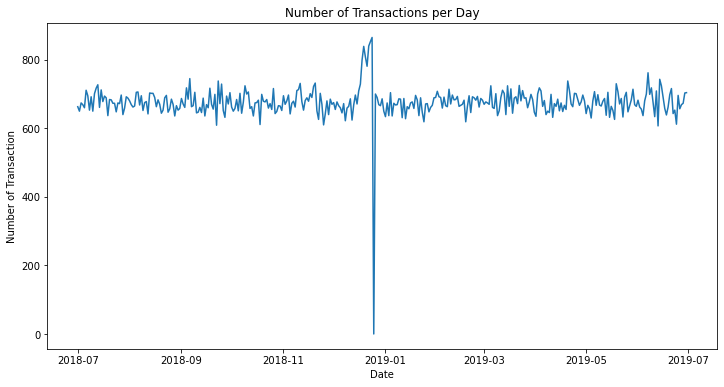

In [129]:
#Plotting transactions over time

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(trans_count['TXN_ID'])

ax.set_title('Number of Transactions per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transaction')

Text(0, 0.5, 'Number of Transaction')

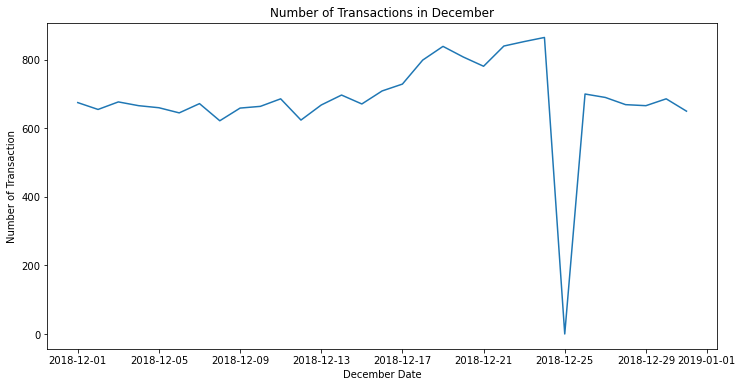

In [130]:
# A dip in December is noticed and on further analysis, the dip is observed to occur on Chrstmas day, as shops were closed
# and hence no transaction was recorded

dec = trans_count.loc['2018-12']
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(dec['TXN_ID'])
ax.set_title('Number of Transactions in December')
ax.set_xlabel('December Date')
ax.set_ylabel('Number of Transaction')

In [131]:
trans.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE
DATE,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme


In [132]:
def psize(data):
    """
        Extracts the digits from an object
    """
    i = re.findall(r'[0-9]+', data)
    return i[0]

In [133]:
# Creating pack size from PROD_NAME

trans['PACK_SIZE'] = trans.apply(lambda x : psize(x.PROD_NAME), axis=1)

In [134]:
# Converting the pack size column to numeric

trans['PACK_SIZE'] = pd.to_numeric(trans['PACK_SIZE'])

In [135]:
trans.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE,PACK_SIZE
DATE,,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig,150
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix,110
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt,165
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme,330


In [136]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246740 entries, 2018-07-01 to 2019-06-30
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STORE_NBR        246740 non-null  int64  
 1   LYLTY_CARD_NBR   246740 non-null  int64  
 2   TXN_ID           246740 non-null  int64  
 3   PROD_NBR         246740 non-null  int64  
 4   PROD_NAME        246740 non-null  object 
 5   PROD_QTY         246740 non-null  int64  
 6   TOT_SALES        246740 non-null  float64
 7   PROD_NAME_ALONE  246740 non-null  object 
 8   PACK_SIZE        246740 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 18.8+ MB


In [137]:
psize_count = trans['PACK_SIZE'].value_counts()

Text(0, 0.5, 'Number of Transactions')

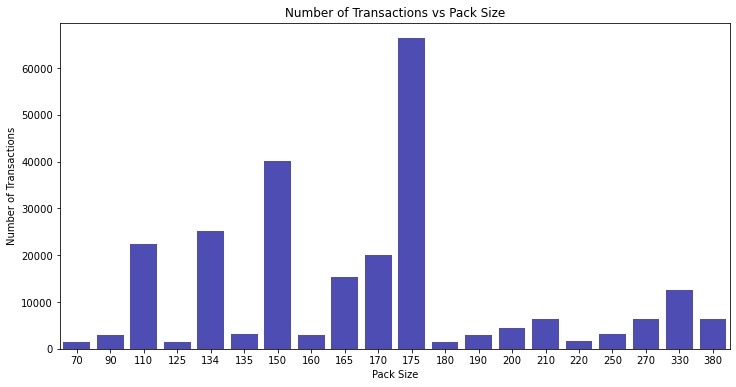

In [138]:
#A barplot showing the number of transactions by pack size.

fig, axe = plt.subplots(figsize=(12,6))

axes = sns.barplot(x = psize_count.index, y = psize_count.values, color = 'b', ax = axe, saturation=.4)
axes.set_title('Number of Transactions vs Pack Size')
axes.set_xlabel('Pack Size')
axes.set_ylabel('Number of Transactions')

In [139]:
# Creating brand name

trans['BRAND_NAME'] = trans.apply(lambda x : x['PROD_NAME_ALONE'].split()[0], axis=1)

In [140]:
trans.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE,PACK_SIZE,BRAND_NAME
DATE,,,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134,Pringles
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig,150,Kettle
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix,110,Infuzions
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt,165,RRD
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme,330,Doritos


In [141]:
trans['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [142]:
# Adjusted the brand names such as replacing Red with RRD to ensure uniformity.

trans['BRAND_NAME'].replace(['Red', 'Snbts', 'Infzns', 'WW', 'Smith', 'NCC', 'Dorito', 'Grain'],
                           ['RRD', 'Sunbites', 'Infuzions', 'Woolworths', 'Smiths', 'Natural', 'Doritos', 'GrnWves'],
                           inplace=True)

In [143]:
trans.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE,PACK_SIZE,BRAND_NAME
DATE,,,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134,Pringles
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig,150,Kettle
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix,110,Infuzions
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt,165,RRD
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme,330,Doritos


# Examine customer data

In [144]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [145]:
purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [146]:
purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [147]:
pur_count = purchase.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).count()

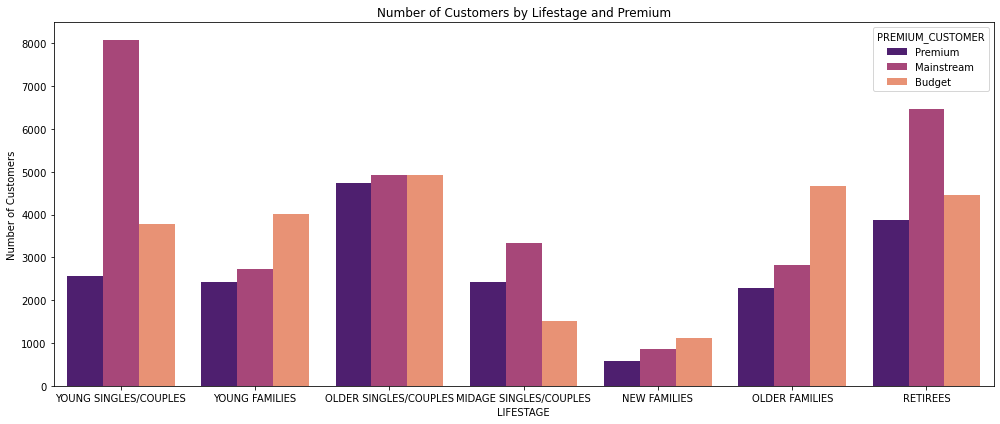

In [148]:
# Distribution of Customers

fig, axe = plt.subplots(figsize=(14,6))

axes = sns.countplot(x = 'LIFESTAGE', hue='PREMIUM_CUSTOMER', data = purchase, ax=axe, palette='magma')
axes.set_title('Number of Customers by Lifestage and Premium')
axes.set_ylabel('Number of Customers')
plt.tight_layout()

In [149]:
# Merging customer data into transaction data

trans.reset_index(inplace=True)
data = trans.merge(purchase, on='LYLTY_CARD_NBR', how='left')

In [150]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
1,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig,150,Kettle,RETIREES,Mainstream
2,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix,110,Infuzions,RETIREES,Premium
3,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt,165,RRD,YOUNG SINGLES/COUPLES,Budget
4,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme,330,Doritos,OLDER SINGLES/COUPLES,Mainstream


In [151]:
data.set_index('DATE', inplace=True)

In [152]:
data.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_ALONE,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,,
2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,Pringles SourCream Onion,134,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,Kettle Sensations Camembert Fig,150,Kettle,RETIREES,Mainstream
2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,Infuzions Thai SweetChili PotatoMix,110,Infuzions,RETIREES,Premium
2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,RRD Pc Sea Salt,165,RRD,YOUNG SINGLES/COUPLES,Budget
2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,Doritos Cheese Supreme,330,Doritos,OLDER SINGLES/COUPLES,Mainstream


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246740 entries, 2018-07-01 to 2019-06-30
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STORE_NBR         246740 non-null  int64  
 1   LYLTY_CARD_NBR    246740 non-null  int64  
 2   TXN_ID            246740 non-null  int64  
 3   PROD_NBR          246740 non-null  int64  
 4   PROD_NAME         246740 non-null  object 
 5   PROD_QTY          246740 non-null  int64  
 6   TOT_SALES         246740 non-null  float64
 7   PROD_NAME_ALONE   246740 non-null  object 
 8   PACK_SIZE         246740 non-null  int64  
 9   BRAND_NAME        246740 non-null  object 
 10  LIFESTAGE         246740 non-null  object 
 11  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.5+ MB


In [154]:
data.to_csv('data.csv')

#  Data analysis on customer segments

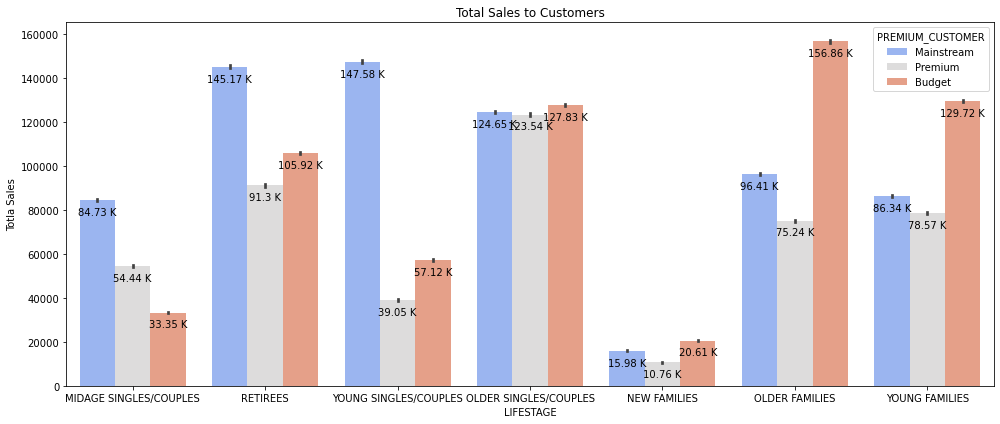

In [155]:
#Calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments 

fig, axe = plt.subplots(figsize=(14,6))

axes = sns.barplot(x = 'LIFESTAGE', y = 'TOT_SALES', hue='PREMIUM_CUSTOMER', data = data,
                   estimator = np.sum,ax=axe, palette='coolwarm')
axes.set_title('Total Sales to Customers')
axes.set_ylabel('Totla Sales')
plt.tight_layout()

for p in axes.patches:
    axes.annotate(f"{round(p.get_height()/1000, 2)} K", (p.get_x() + p.get_width()/2 , p.get_height()),
                 ha='center', va = 'center', xytext=(0, -12), textcoords='offset points', size=10)

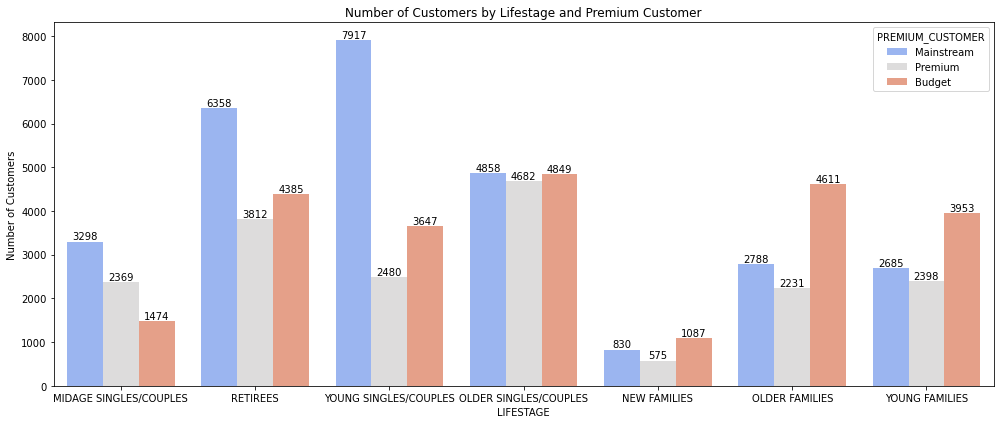

In [156]:
#Let's see if the higher sales are due to there being more customers who buy chips.

fig, axe = plt.subplots(figsize=(14,6))

axes = sns.countplot(x = 'LIFESTAGE', hue='PREMIUM_CUSTOMER', data = data.drop_duplicates(subset=['LYLTY_CARD_NBR'])
                     ,ax=axe, palette='coolwarm')
axes.set_title('Number of Customers by Lifestage and Premium Customer')
axes.set_ylabel('Number of Customers')
plt.tight_layout()

#for p in axes.patches:
    #axes.annotate(f"{round(p.get_height()/1000, 2)} K", (p.get_x() + p.get_width()/2 , p.get_height()),
                 #ha='center', va = 'center', xytext=(0, -12), textcoords='offset points', size=10)
        
for i in [0,1,2]:
    plt.bar_label(axes.containers[i])

In [157]:
n = data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).sum()

n_2 = n.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(['mean'])['PROD_QTY'].reset_index()

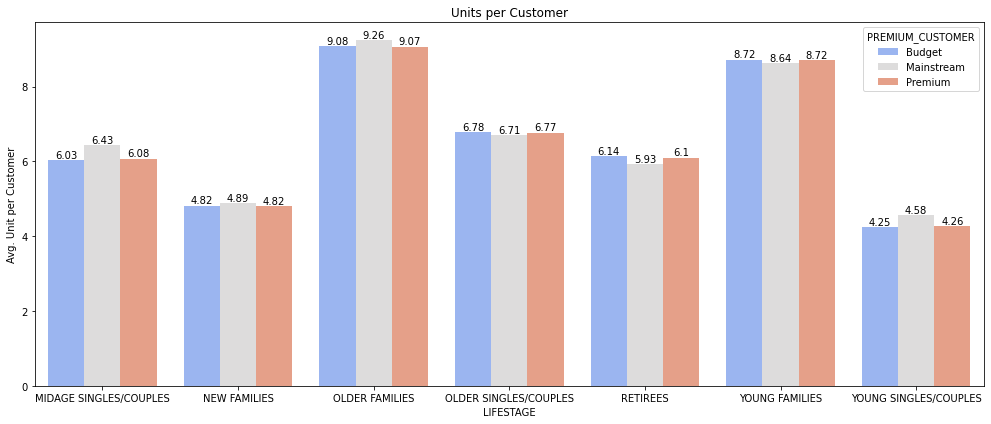

In [158]:
#Higher sales may also be driven by more units of chips being bought per customer.

fig, axe = plt.subplots(figsize=(14,6))

axes = sns.barplot(x = 'LIFESTAGE', y = 'mean', hue='PREMIUM_CUSTOMER', data = n_2,
                   estimator = np.mean,ax=axe, palette='coolwarm')
axes.set_title('Units per Customer')
axes.set_ylabel('Avg. Unit per Customer')
plt.tight_layout()

#for p in axes.patches:
    #axes.annotate(f"{round(p.get_height()/1000, 2)} K", (p.get_x() + p.get_width()/2 , p.get_height()),
                 #ha='center', va = 'center', xytext=(0, -12), textcoords='offset points', size=10)
        
for i in [0,1,2]:
    plt.bar_label(axes.containers[i], fmt='%.3g')

In [159]:
n_3 = n.assign(avg = lambda x : x['TOT_SALES']/x['PROD_QTY'])

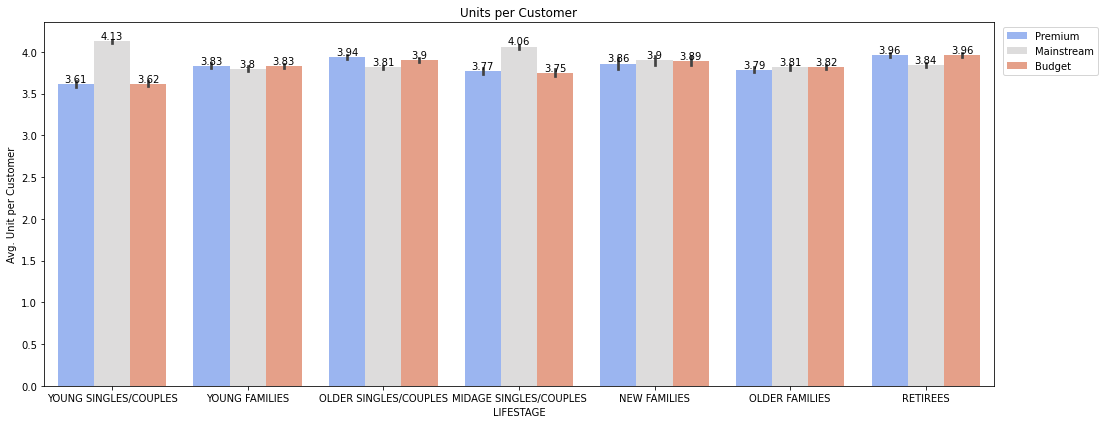

In [160]:
# Investigating the average price per unit chips bought for each customer segment as this is also a driver of total sales

fig, axe = plt.subplots(figsize=(14,6))

axes = sns.barplot(x = 'LIFESTAGE', y = 'avg', hue='PREMIUM_CUSTOMER', data = n_3.reset_index(),
                   estimator = np.mean,ax=axe, palette='coolwarm')
axes.set_title('Units per Customer')
axes.set_ylabel('Avg. Unit per Customer')
plt.tight_layout()

#for p in axes.patches:
    #axes.annotate(f"{round(p.get_height()/1000, 2)} K", (p.get_x() + p.get_width()/2 , p.get_height()),
                 #ha='center', va = 'center', xytext=(0, -12), textcoords='offset points', size=10)
        
for i in [0,1,2]:
    plt.bar_label(axes.containers[i], fmt='%.3g')
    
plt.legend(loc='upper right', bbox_to_anchor = (1.115,1))

In [161]:
n_3.reset_index(inplace=True)

In [162]:
main = n_3.loc[(n_3['PREMIUM_CUSTOMER'] == 'Mainstream') & 
        ((n_3['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (n_3['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

bop = n_3.loc[((n_3['PREMIUM_CUSTOMER'] == 'Premium') | (n_3['PREMIUM_CUSTOMER'] == 'Budget'))& 
        ((n_3['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (n_3['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

In [163]:
# t-test to see if the difference between mainstream vs premium and budget midage 
# and young singles and couples is significant.

ttest_ind(main['avg'], bop['avg'])

Ttest_indResult(statistic=38.40944799644965, pvalue=0.0)

#  Deep dive into specific customer segments for insights

In [164]:
data.loc[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
        (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]['BRAND_NAME'].value_counts()

Kettle        3844
Doritos       2379
Pringles      2315
Smiths        1921
Infuzions     1250
Thins         1166
Twisties       900
Tostitos       890
RRD            875
Cobs           864
GrnWves        646
Tyrrells       619
Woolworths     479
Natural        394
Cheezels       346
CCs            222
Cheetos        166
Sunbites       128
French          78
Burger          62
Name: BRAND_NAME, dtype: int64

In [165]:
# Using apriori and association rules to investigate relationships of
# Mainstream Young YOUNG SINGLES/COUPLE

temp = data.reset_index().rename(columns={'index':'transaction'})
temp['Segment'] = temp['LIFESTAGE'] + '-' + temp['PREMIUM_CUSTOMER']
app = pd.concat([pd.get_dummies(temp['Segment'] == 'YOUNG SINGLES/COUPLES-Mainstream'), 
                 pd.get_dummies(temp['BRAND_NAME'])], axis = 1)

In [176]:
mld = mlp.apriori(app, min_support=0.01, use_colnames=True)

rules = mlp.association_rules(mld, min_threshold=0.8, metric='lift')

In [177]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(False),(CCs),0.920791,0.018445,0.017545,0.019054,1.033046,0.000561,1.000621
1,(CCs),(False),0.018445,0.920791,0.017545,0.951220,1.033046,0.000561,1.623782
2,(False),(Cheetos),0.920791,0.011863,0.011190,0.012153,1.024431,0.000267,1.000293
3,(Cheetos),(False),0.011863,0.920791,0.011190,0.943287,1.024431,0.000267,1.396653
4,(False),(Cheezels),0.920791,0.018655,0.017253,0.018737,1.004388,0.000075,1.000083
5,(Cheezels),(False),0.018655,0.920791,0.017253,0.924832,1.004388,0.000075,1.053753
6,(False),(Cobs),0.920791,0.039284,0.035783,0.038861,0.989218,-0.000390,0.999559
7,(Cobs),(False),0.039284,0.920791,0.035783,0.910864,0.989218,-0.000390,0.888625
8,(False),(Doritos),0.920791,0.102229,0.092587,0.100552,0.983594,-0.001544,0.998135
9,(Doritos),(False),0.102229,0.920791,0.092587,0.905685,0.983594,-0.001544,0.839834


In [183]:
#To study relationship where the antecedent is Young Singles/Couples-Mainstream i.e. when the customer
# is belongs to the Young Singles/Couples-Mainstream Segment

rules[rules['antecedents'].apply(lambda x : list(x) == [True])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(True),(Kettle),0.079209,0.167334,0.015579,0.196684,1.1754,0.002325,1.036537


In [179]:
pack = pd.concat([pd.get_dummies(temp['PACK_SIZE']), 
                  pd.get_dummies(temp['Segment'] == 'YOUNG SINGLES/COUPLES-Mainstream')], axis=1)

ap = mlp.apriori(pack, min_support=0.01, use_colnames=True)
ap_rules = mlp.association_rules(ap, min_threshold=0.8, metric='lift')

In [180]:
ap.sort_values('support', ascending=False).head()

,support,itemsets
16,0.920791,(False)
8,0.269069,(175)
27,0.248817,"(False, 175)"
4,0.162937,(150)
22,0.150454,"(False, 150)"


In [181]:
ap_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(False),(90),0.920791,0.012191,0.011672,0.012676,1.039809,0.000447,1.000492
1,(90),(False),0.012191,0.920791,0.011672,0.957447,1.039809,0.000447,1.861409
2,(False),(110),0.920791,0.090731,0.082419,0.089509,0.986526,-0.001126,0.998657
3,(110),(False),0.090731,0.920791,0.082419,0.908384,0.986526,-0.001126,0.864578
4,(False),(134),0.920791,0.101735,0.092352,0.100297,0.985866,-0.001324,0.998402
5,(134),(False),0.101735,0.920791,0.092352,0.907776,0.985866,-0.001324,0.858877
6,(False),(135),0.920791,0.013200,0.012025,0.013059,0.989324,-0.000130,0.999857
7,(135),(False),0.013200,0.920791,0.012025,0.910961,0.989324,-0.000130,0.889598
8,(False),(150),0.920791,0.162937,0.150454,0.163396,1.002821,0.000423,1.000549
9,(150),(False),0.162937,0.920791,0.150454,0.923389,1.002821,0.000423,1.033907


In [184]:
#To study relationship where the antecedent is Young Singles/Couples-Mainstream i.e. when the customer
# is belongs to the Young Singles/Couples-Mainstream Segment

ap_rules[ap_rules['antecedents'].apply(lambda x : list(x) == [True])].sort_values(['lift', 'support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(True),(150),0.079209,0.162937,0.012483,0.157593,0.967205,-0.000423,0.993657
20,(True),(175),0.079209,0.269069,0.020252,0.255679,0.950239,-0.001061,0.982012


# Insights From Deep Dive Into Young Singles/Couples-Mainstream

## From the affinity analysis, it is noticed that Young Singles/Couples-Mainstream prefer to buy Kettle brand and either 175g or 150g pack size.